### Importação dos dados



In [ ]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


df = pd.concat([loja, loja2, loja3, loja4])


df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


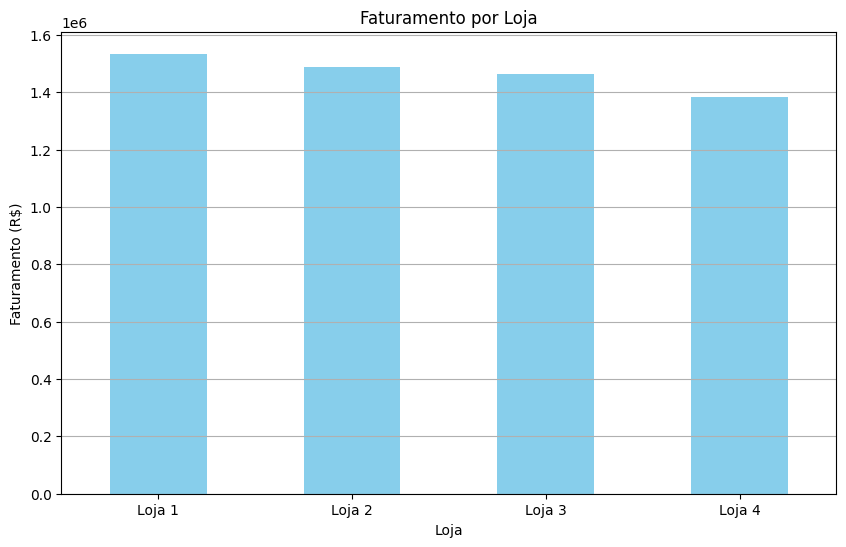

In [ ]:
import matplotlib.pyplot as plt


faturamento_por_loja = df.groupby('Loja')['Preço'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,6))
faturamento_por_loja.plot(kind='bar', color='skyblue')
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 2. Vendas por Categoria


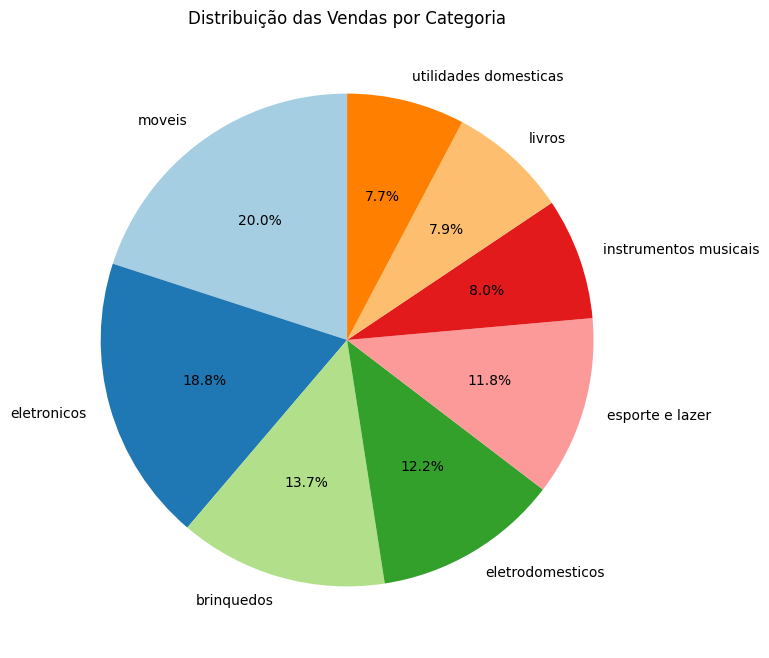

In [ ]:

vendas_categoria = df['Categoria do Produto'].value_counts()


plt.figure(figsize=(8,8))
vendas_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição das Vendas por Categoria')
plt.ylabel('')  # tira o ylabel automático
plt.show()


# 3. Média de Avaliação das Lojas

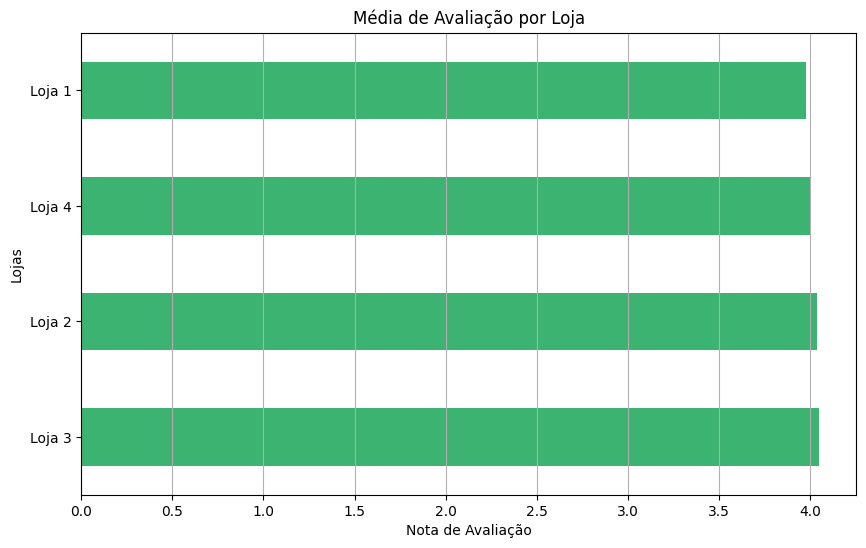

In [ ]:
import matplotlib.pyplot as plt


avaliacao_media = df.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)


plt.figure(figsize=(10,6))
avaliacao_media.plot(kind='barh', color='mediumseagreen')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Lojas')
plt.grid(axis='x')
plt.show()


# 4. Produtos Mais e Menos Vendidos

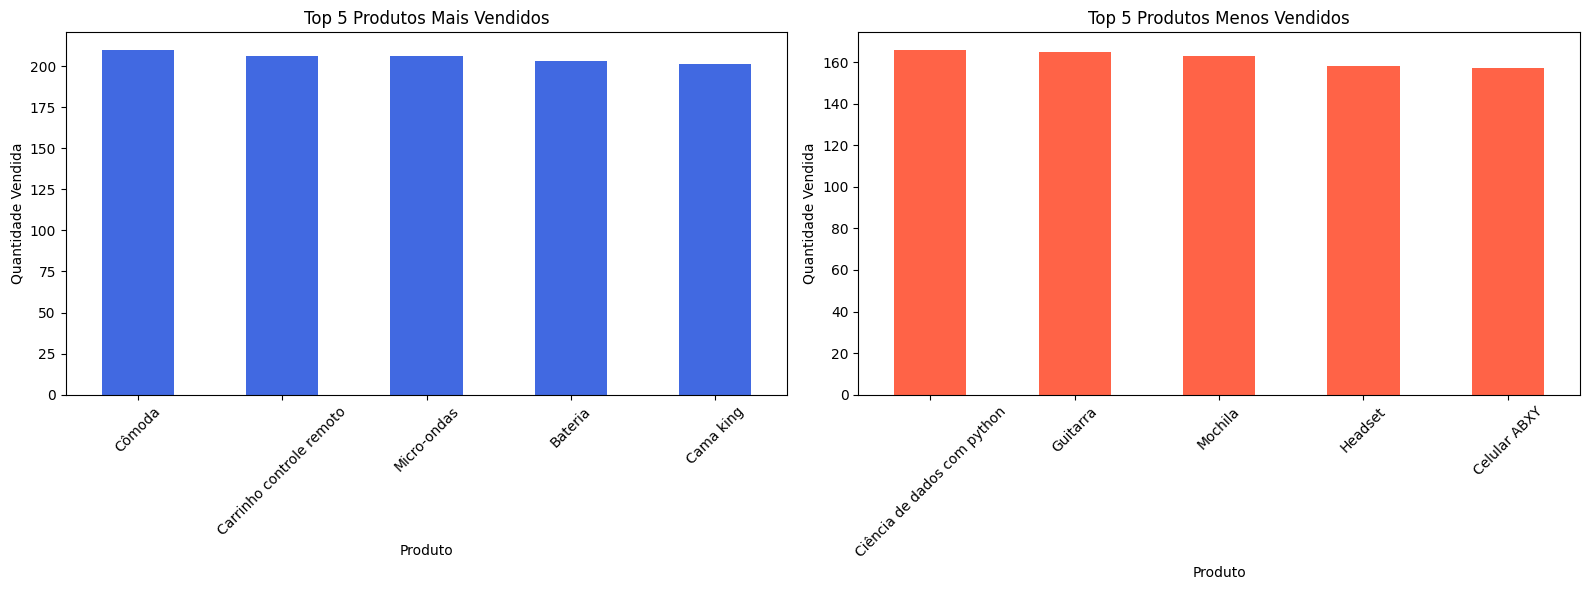

In [ ]:

produtos_vendas = df['Produto'].value_counts().sort_values(ascending=False)


top5_mais_vendidos = produtos_vendas.head(5)
top5_menos_vendidos = produtos_vendas.tail(5)


fig, ax = plt.subplots(1, 2, figsize=(16,6))


top5_mais_vendidos.plot(kind='bar', ax=ax[0], color='royalblue')
ax[0].set_title('Top 5 Produtos Mais Vendidos')
ax[0].set_ylabel('Quantidade Vendida')
ax[0].set_xlabel('Produto')
ax[0].tick_params(axis='x', rotation=45)


top5_menos_vendidos.plot(kind='bar', ax=ax[1], color='tomato')
ax[1].set_title('Top 5 Produtos Menos Vendidos')
ax[1].set_ylabel('Quantidade Vendida')
ax[1].set_xlabel('Produto')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


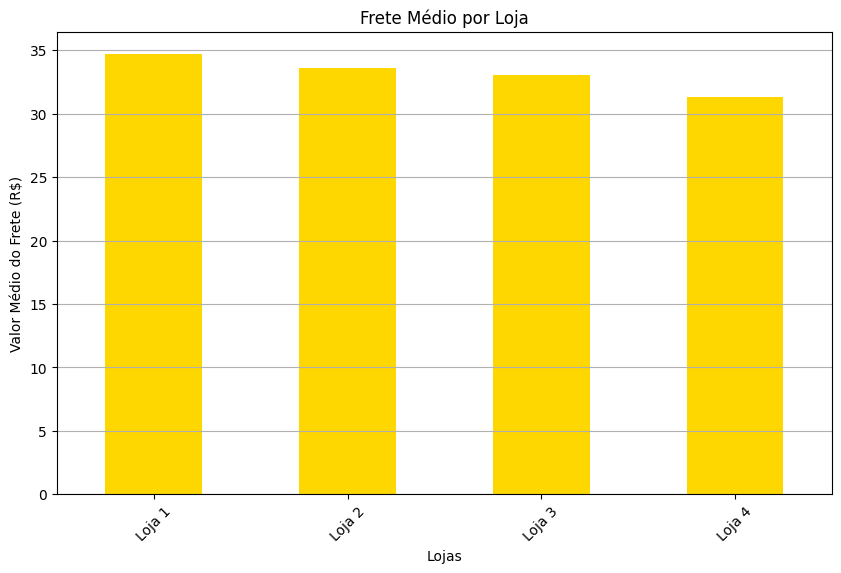

In [ ]:

frete_medio = df.groupby('Loja')['Frete'].mean().sort_values(ascending=False)


plt.figure(figsize=(10,6))
frete_medio.plot(kind='bar', color='gold')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Lojas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
print(df.columns)


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')
